<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

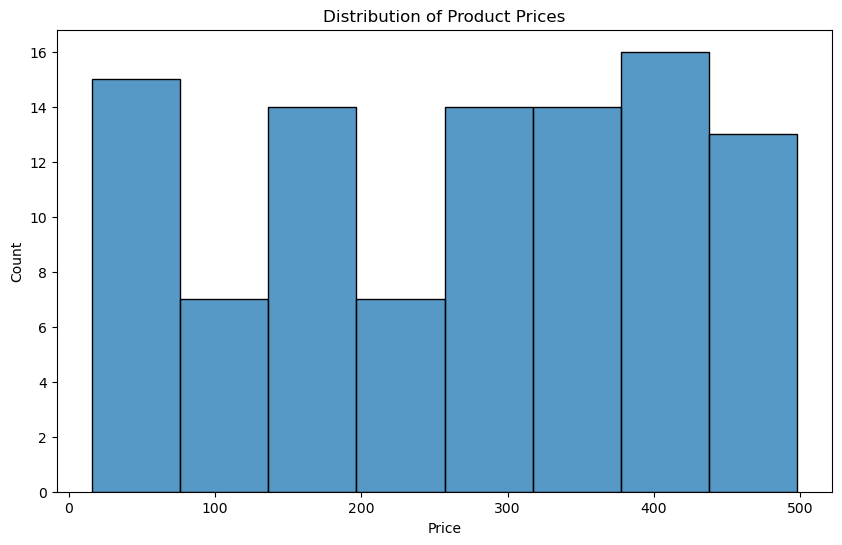

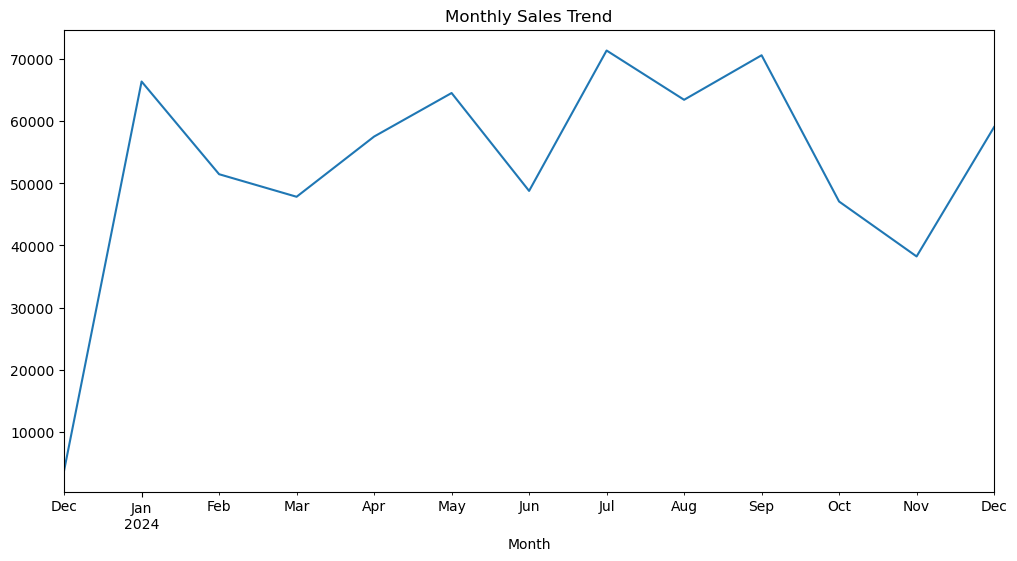

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display basic information
print(customers.info())
print(products.info())
print(transactions.info())

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Create visualizations
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'])
plt.title('Distribution of Product Prices')
plt.show()

# Analyze transactions over time
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.show()


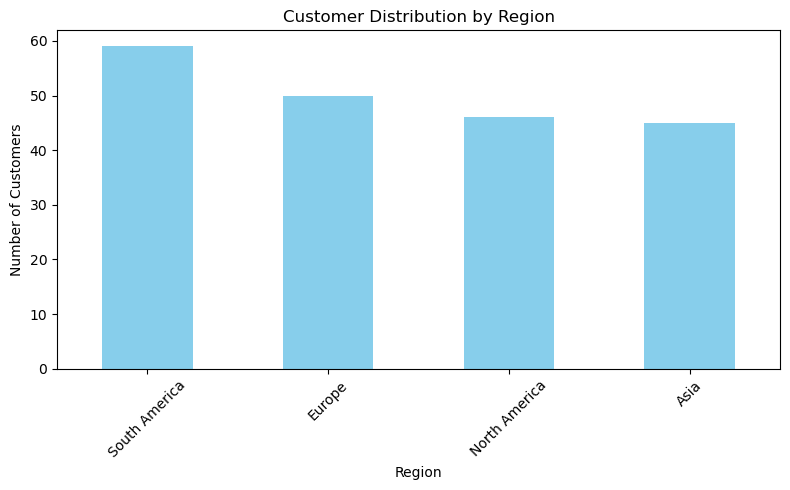

In [26]:

#Customer Segmentation
#To analyze the distribution of customers across regions:

region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
region_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

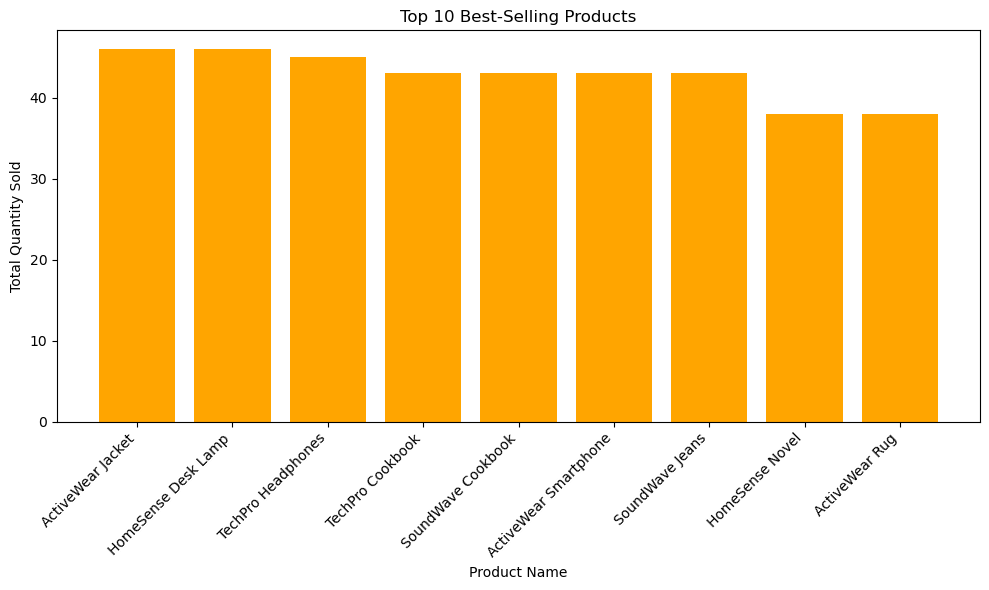

In [27]:
# Product Performance
# To identify top-selling products:
product_sales = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = products[products['ProductID'].isin(product_sales.index)]

plt.figure(figsize=(10, 6))
plt.bar(top_products['ProductName'], product_sales, color='orange')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


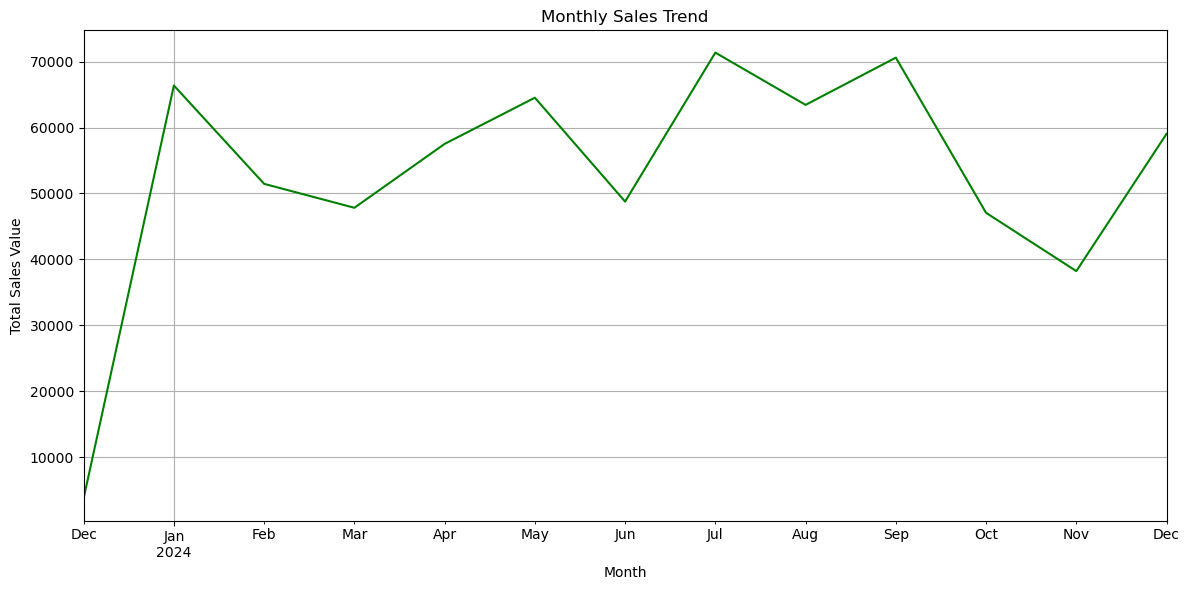

In [28]:
# Seasonal Trends
# To examine transaction patterns over time:

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid()
plt.tight_layout()
plt.show()

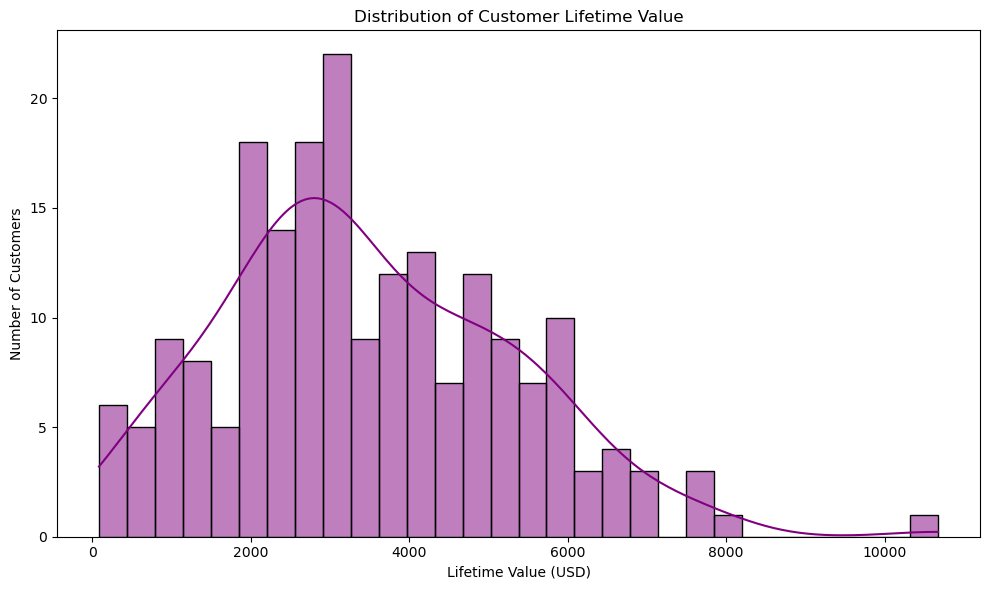

In [29]:
# Customer Lifetime Value
# To analyze the distribution of customer lifetime value:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transactions = pd.read_csv('Transactions.csv')

customer_lifetime_value = transactions.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
sns.histplot(customer_lifetime_value, bins=30, kde=True, color='purple')
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Lifetime Value (USD)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


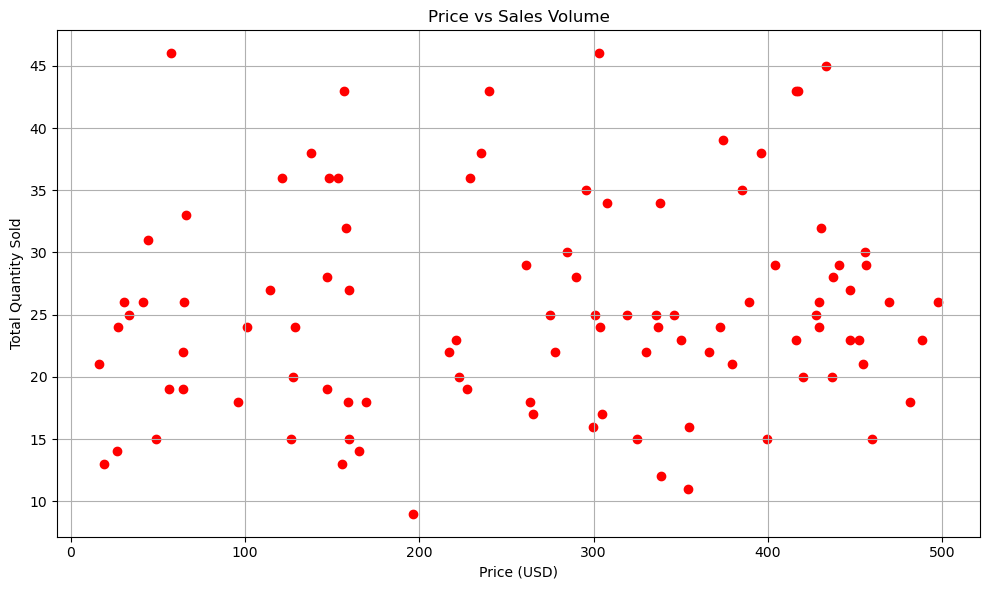

In [30]:
# Pricing Strategy
# To investigate the relationship between product prices and sales volumes:
import pandas as pd
import matplotlib.pyplot as plt

transactions = pd.read_csv('Transactions.csv')

price_sales = transactions.groupby('Price')['Quantity'].sum()
plt.figure(figsize=(10, 6))
plt.scatter(price_sales.index, price_sales, color='red')
plt.title('Price vs Sales Volume')
plt.xlabel('Price (USD)')
plt.ylabel('Total Quantity Sold')
plt.grid()
plt.tight_layout()
plt.show()
